# Example Sheet 3

Initial function setup:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.core import (
    f,
    time_interpolator,
    plot_with_parameters,
    ratio_interpolated_to_true,
    plot_ratio,
    generate_a_sweep_dataframe,
    build_at_interpolator,
    eval_at_interpolator,
    ratio_at_interpolator,
)
from ipywidgets import interactive, interact, FloatSlider
import ipywidgets as widgets

# Define default parameters
a = 0.1
b = -0.13
c = 9
t = np.linspace(0, 1, 100)
f = f(t, a, b, c)

Plot of the function:

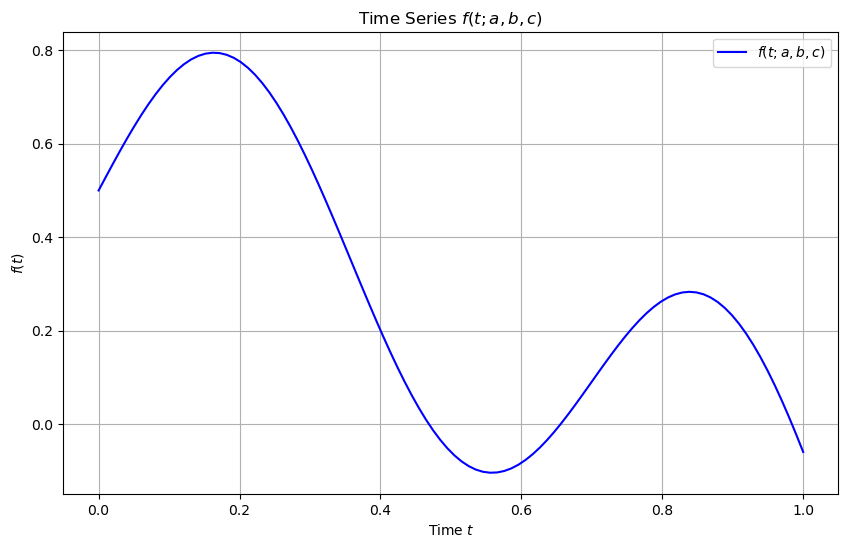

In [2]:
plot_with_parameters(a,b,c)


Interactive widget plot:

In [3]:
# Create interactive widget
interactive_plot = interactive(
    plot_with_parameters,
    a=widgets.FloatSlider(min=0, max=1, step=0.01, value=0.1),
    b=widgets.FloatSlider(min=-0.5, max=0.5, step=0.01, value=-0.13),
    c=widgets.FloatSlider(min=5, max=10, step=0.1, value=9)
)

display(interactive_plot)

interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, step=0.01), FloatSlider(value=-0.13, de…

### Question 1


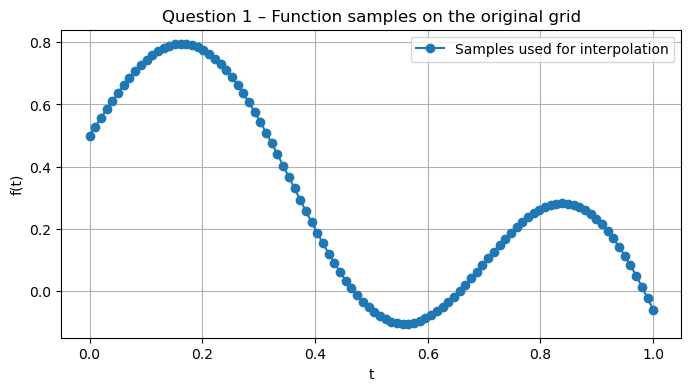

In [4]:
# build interpolator on the original t grid
interp, t_grid, y_grid = time_interpolator(a, b, c, grid_n=100)

# show the original samples used for interpolation
plt.figure(figsize=(8, 4))
plt.plot(t_grid, y_grid, "o-", label="Samples used for interpolation")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Question 1 – Function samples on the original grid")
plt.grid(True)
plt.legend()
plt.show()


### Question 2

In [5]:
# finer evaluation grid
t_fine = np.linspace(0, 1, 1001)

# interpolated values
y_interp_fine = interp(t_fine)

# store for Q3
t_fine_q2 = t_fine
y_interp_fine_q2 = y_interp_fine

t_fine_q2[:5], y_interp_fine_q2[:5]  # quick peek


(array([0.   , 0.001, 0.002, 0.003, 0.004]),
 array([0.5       , 0.50283577, 0.50567153, 0.5085073 , 0.51134306]))

### Question 3


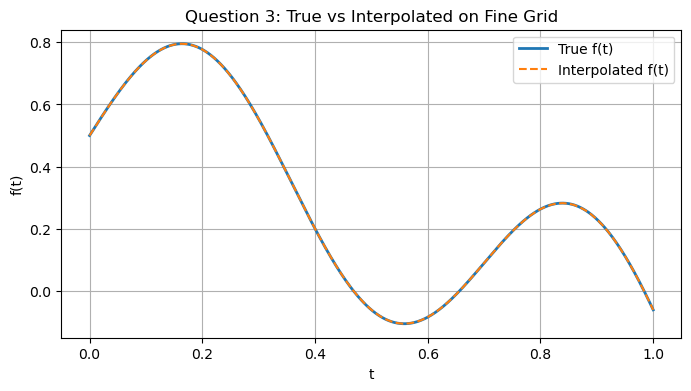

In [6]:
from src.core import f
# compute exact function on the fine grid
y_true_fine = f(t_fine_q2, a, b, c)

plt.figure(figsize=(8, 4))
plt.plot(t_fine_q2, y_true_fine, label="True f(t)", linewidth=2)
plt.plot(t_fine_q2, y_interp_fine_q2, "--", label="Interpolated f(t)")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Question 3: True vs Interpolated on Fine Grid")
plt.grid(True)
plt.legend()
plt.show()

### Question 4


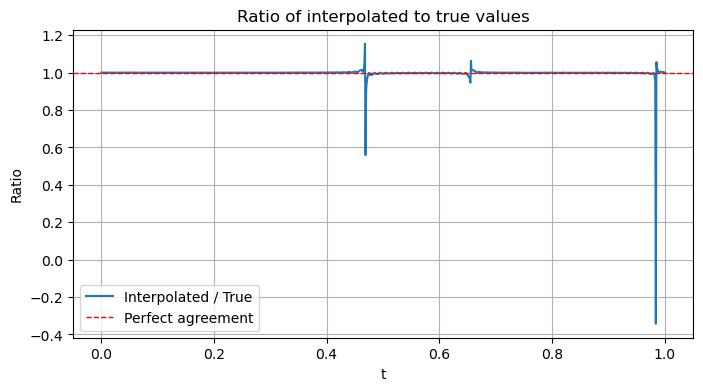

In [7]:
ratio_q4, y_interp_q4, y_true_q4 = ratio_interpolated_to_true(interp, t_fine_q2, a, b, c)

plt.figure(figsize=(8, 4))
plot_ratio(t_fine_q2, ratio_q4)
plt.show()


For most of the plot, the ratio of the linearly interpolated values to the actual values is close to 1, which is in accordance with what we see in the plot for Q3. The large and abrupt deviations away from 1 occur around the values of t where the function approaches 0, and so the ratio becomes numerically unstable - some of this has been controlled for with the use of NaNs when the function is very close to zero. 

### Question 5


,a=0.00,a=0.11,a=0.22,a=0.33,a=0.44,a=0.56,a=0.67,a=0.78,a=0.89,a=1.00
t,,,,,,,,,,
0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
0.010101,0.499898,0.530199,0.542750,0.552381,0.560500,0.567653,0.574120,0.580067,0.585602,0.590801
0.020202,0.499592,0.560023,0.585055,0.604262,0.620454,0.634720,0.647618,0.659478,0.670517,0.680886
0.030303,0.499082,0.589223,0.626560,0.655210,0.679363,0.700643,0.719881,0.737572,0.754038,0.769504
0.040404,0.498368,0.617551,0.666918,0.704799,0.736734,0.764869,0.790305,0.813696,0.835468,0.855917


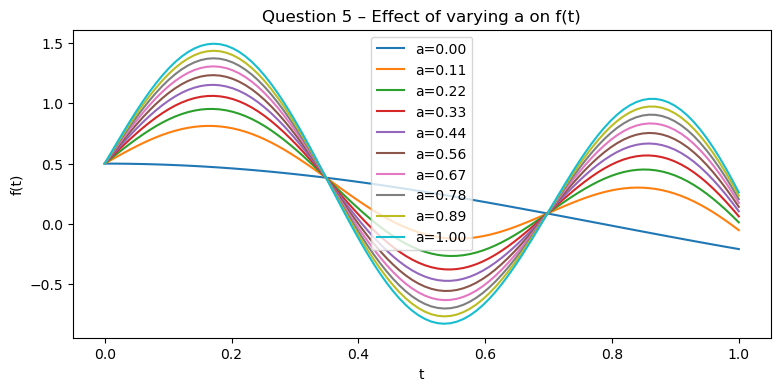

In [8]:

df_q5, a_vals_q5, t_grid_q5 = generate_a_sweep_dataframe(b=b, c=c, t_grid=t, num_samples=10)

display(df_q5.head())

ax = df_q5.plot(figsize=(9, 4))
ax.set_title("Question 5 – Effect of varying a on f(t)")
ax.set_xlabel("t")
ax.set_ylabel("f(t)")
plt.show()

### Question 6


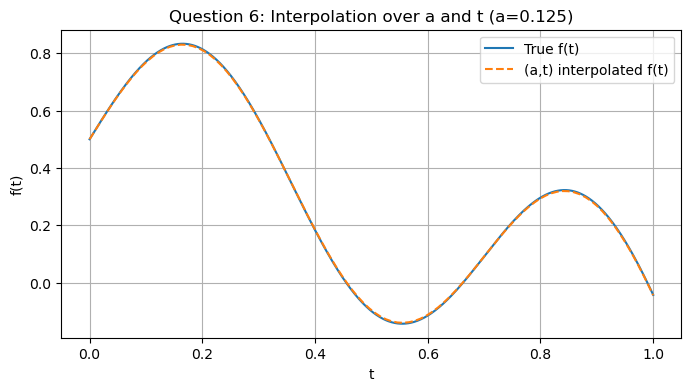

In [9]:

interp_at, a_grid_q6, t_grid_q6, values_q6 = build_at_interpolator(b=b, c=c)
a_target = 0.125
t_fine_q6 = np.linspace(0, 1, 1001)

y_interp_q6 = eval_at_interpolator(interp_at, a_target, t_fine_q6)
y_true_q6 = f(t_fine_q6, a_target, b, c)

plt.figure(figsize=(8, 4))
plt.plot(t_fine_q6, y_true_q6, label="True f(t)")
plt.plot(t_fine_q6, y_interp_q6, "--", label="(a,t) interpolated f(t)")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.title("Question 6: Interpolation over a and t (a=0.125)")
plt.grid(True)
plt.legend()
plt.show()

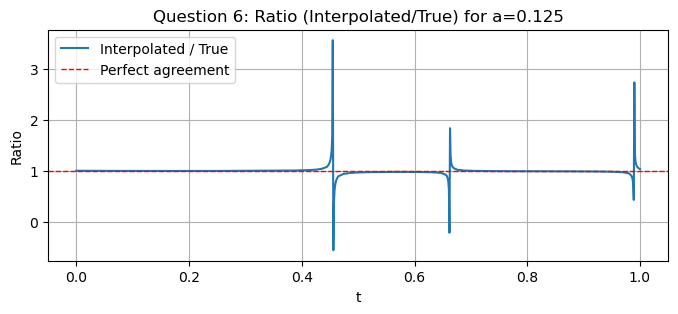

In [10]:
ratio_q6, _, _ = ratio_at_interpolator(interp_at, a_target, t_fine_q6, b, c)

plt.figure(figsize=(8, 3))
plot_ratio(t_fine_q6, ratio_q6)
plt.title("Question 6: Ratio (Interpolated/True) for a=0.125")
plt.show()

### Question 7


In [ ]:
interp_at, a_grid_q7, t_grid_q7, _ = build_at_interpolator(b=b, c=c)

def show_ratio(a_value):
    ratio, _, _ = ratio_at_interpolator(interp_at, a_value, t_grid_q7, b, c)
    fig, ax = plt.subplots(figsize=(8, 3))
    plot_ratio(t_grid_q7, ratio, ax=ax)
    ax.set_title(f"Question 7 – Ratio, a={a_value:.3f}")
    plt.show()

interact(
    show_ratio,
    a_value=FloatSlider(
        min=float(a_grid_q7.min()),
        max=float(a_grid_q7.max()),
        step=0.01,
        value=0.125,
        description="a"
    ),
)

interactive(children=(FloatSlider(value=0.125, description='a', max=1.0, step=0.01), Output()), _dom_classes=(…

<function __main__.show_ratio(a_value)>

### Question 8


For most slider positions the ratio stays near 1, meaning the 2D interpolant over (a,t) closely tracks the exact curve, just like Q7’s plots show. Small, smooth deviations appear when a falls between the sampled grid values because the interpolator blends neighboring time series, so it can’t match the true surface exactly away from the grid points. The spikes and NaNs at zero crossings persist here too - the true function’s denominator vanishes there, so the ratio becomes numerically unstable even though the underlying curves agree.